<a href="https://colab.research.google.com/github/adityasaxena-crypto/IGI_model/blob/main/IGI2(late_delivery).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/DataCoSupplyChainDataset.csv",encoding= 'unicode_escape')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.drop(df.columns.difference(['Type','Days for shipping (real)','Days for shipment (scheduled)','Delivery Status','Shipping Mode','Late_delivery_risk']), 1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Shipping Mode
0,DEBIT,3,4,Advance shipping,0,Standard Class
1,TRANSFER,5,4,Late delivery,1,Standard Class
2,CASH,4,4,Shipping on time,0,Standard Class
3,DEBIT,3,4,Advance shipping,0,Standard Class
4,PAYMENT,2,4,Advance shipping,0,Standard Class
...,...,...,...,...,...,...
180514,CASH,4,4,Shipping on time,0,Standard Class
180515,DEBIT,3,2,Late delivery,1,Second Class
180516,TRANSFER,5,4,Late delivery,1,Standard Class
180517,PAYMENT,3,4,Advance shipping,0,Standard Class


In [ ]:
string_data = list(df.select_dtypes(include=['object']).columns)
print(string_data)
df[string_data]

['Type', 'Delivery Status', 'Shipping Mode']


,Type,Delivery Status,Shipping Mode
0,DEBIT,Advance shipping,Standard Class
1,TRANSFER,Late delivery,Standard Class
2,CASH,Shipping on time,Standard Class
3,DEBIT,Advance shipping,Standard Class
4,PAYMENT,Advance shipping,Standard Class
...,...,...,...
180514,CASH,Shipping on time,Standard Class
180515,DEBIT,Late delivery,Second Class
180516,TRANSFER,Late delivery,Standard Class
180517,PAYMENT,Advance shipping,Standard Class


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[string_data] = df[string_data].apply(le.fit_transform)

In [ ]:
df.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Delivery Status                  0
Late_delivery_risk               0
Shipping Mode                    0
dtype: int64

In [ ]:
X = df.drop('Late_delivery_risk',axis=1)
y = df['Late_delivery_risk']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0,max_iter=1000).fit(X_train,y_train)

In [ ]:
clf1.score(X_test,y_test)

0.9967501292562227

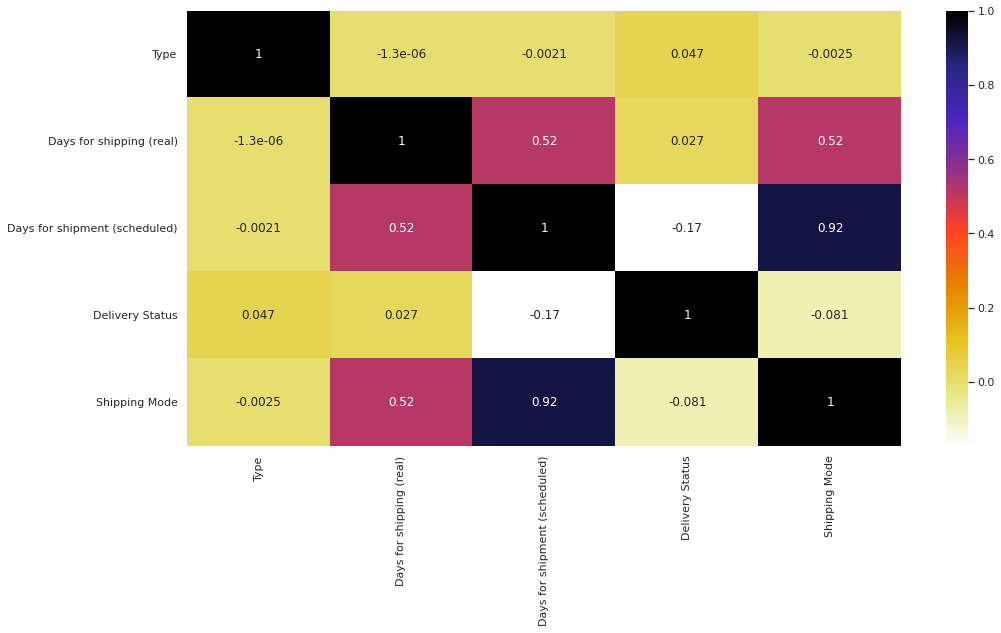

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt



corr =X_train.corr()
sns.set(rc = {'figure.figsize':(16,8)})
# plot the heatmap
sns.heatmap(corr,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
 df=df.drop('Days for shipment (scheduled)',axis=1)

KeyError: ignored

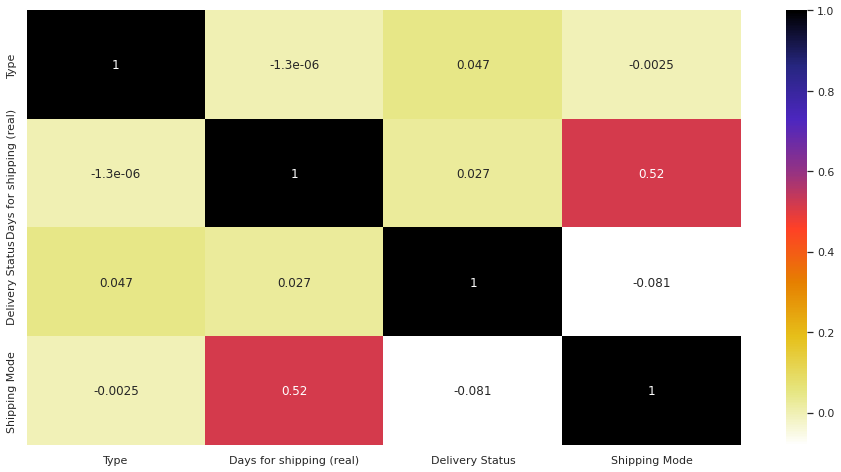

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt



corr =X_train.corr()
sns.set(rc = {'figure.figsize':(16,8)})
# plot the heatmap
sns.heatmap(corr,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
X = df.drop('Late_delivery_risk',axis=1)
y = df['Late_delivery_risk']


In [ ]:
X

,Type,Days for shipping (real),Delivery Status,Shipping Mode
0,1,3,0,3
1,3,5,1,3
2,0,4,3,3
3,1,3,0,3
4,2,2,0,3
...,...,...,...,...
180514,0,4,3,3
180515,1,3,1,2
180516,3,5,1,3
180517,2,3,0,3


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [112]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=2,max_iter=100).fit(X_train,y_train)

In [113]:
clf.score(X_test,y_test)

0.9771955092695177

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test=(list(y_test))
print(y_test)

[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 

In [ ]:
print(y_pred)

[0 1 1 ... 0 1 0]


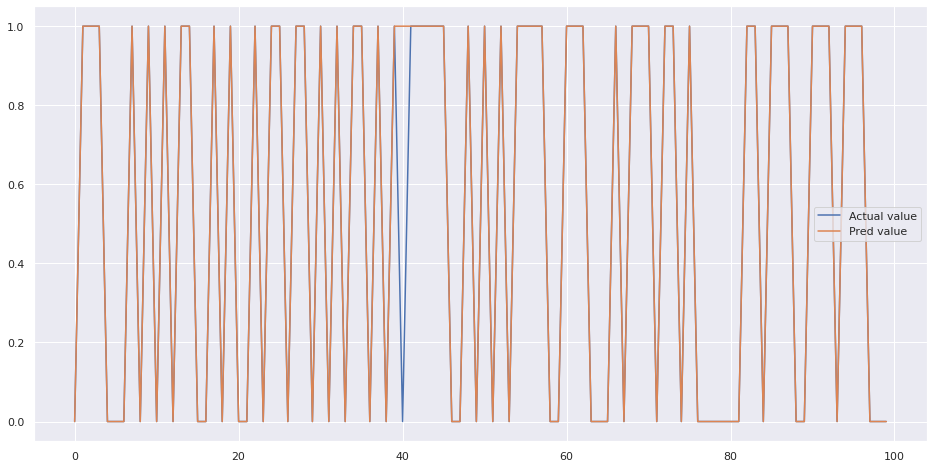

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test[0:100],label="Actual value")
plt.plot(y_pred[0:100],label="Pred value")
plt.legend()
plt.show()


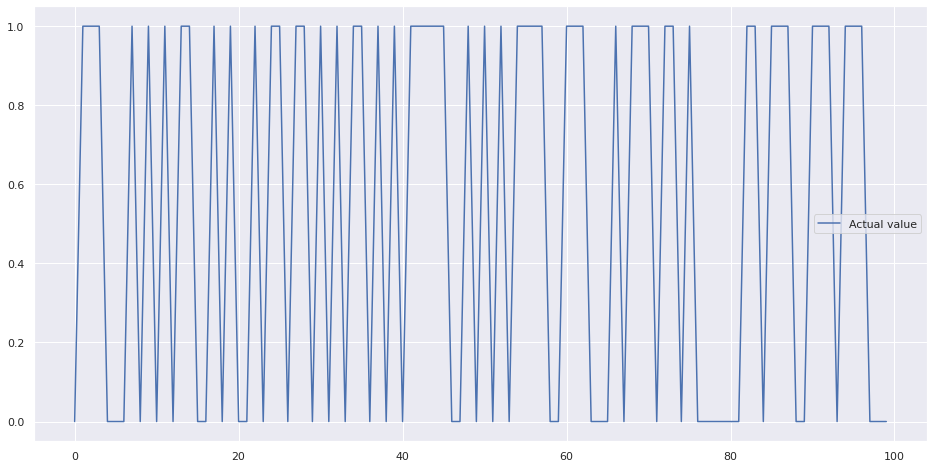

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test[0:100],label="Actual value")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[23614   918]
 [  317 29307]]


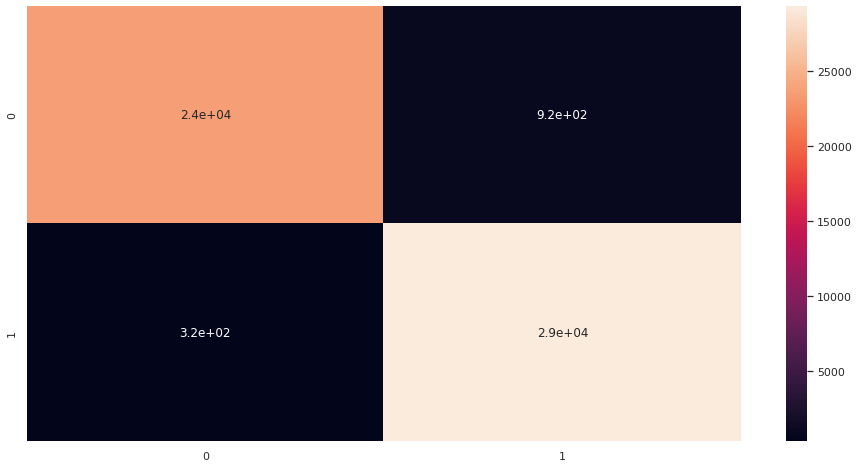

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [ ]:
feature_importance=pd.DataFrame({'feature':list(X.columns),'feature_importance':[abs(i) for i in clf.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
3,Shipping Mode,6.215419
1,Days for shipping (real),3.448030
2,Delivery Status,2.944586
0,Type,0.617072


In [ ]:
yuyu=list(feature_importance["feature_importance"])

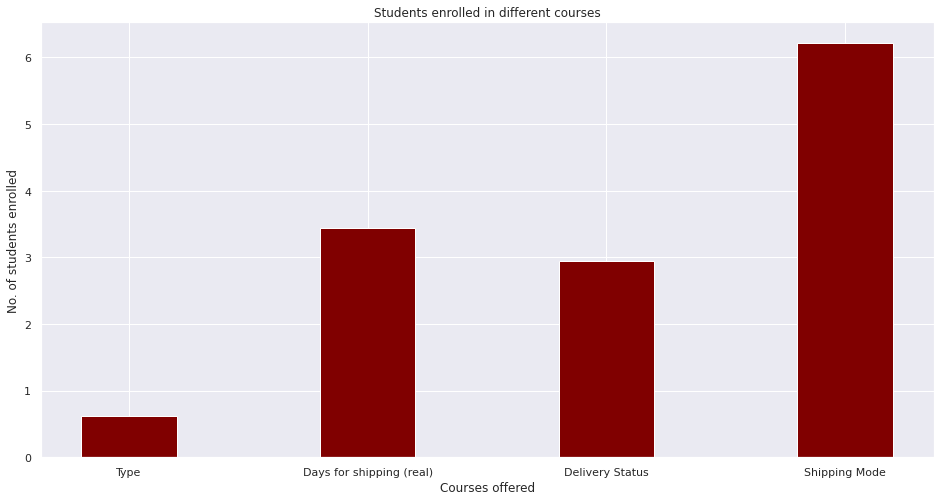

In [ ]:
plt.bar(X.columns, yuyu, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()